In [1]:
import torch
import pandas as pd
import requests
from graphdriver.commons import data, results, setup
from graphdriver.utils import paths, cons

/home/joe/miniconda3/envs/graph/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
denovos = {'BLCA':	['EEF1A1',	'FUS',	    'BRCA1'],
'BRCA':	['ATXN3',	'CDC5L',	'XPO1'],
'CESC':	['ESR1',	'BRD4',	'EGFR'],
'COAD':	['CUL1',	'SQSTM1',	'CIC'],
'ESCA':	['HTT',	    'PTEN',	'EP300'],
'HNSC':	['CSNK2A1',	'MYC',	    'RNF2'],
'LIHC':	['FN1',	    'EGFR',	'APP'],
'LUAD':	['LMNB1',	'HSPA8',	'AKT1'],
'LUSC':	['CHD3',	'RHOA',	'RBM39'],
'PRAD':	['GSK3B',	'MED1',	'CCT2'],
'STAD':	['LARP7',	'NRAS',	'PIK3R1'],
'THCA':	['HSP90AA1','HSP90AB1','XPO1'],
'UCEC':	['HSPB1',	'SARNP',	'RPL36']}


In [3]:
df = pd.DataFrame(denovos).T
df

,0,1,2
BLCA,EEF1A1,FUS,BRCA1
BRCA,ATXN3,CDC5L,XPO1
CESC,ESR1,BRD4,EGFR
COAD,CUL1,SQSTM1,CIC
ESCA,HTT,PTEN,EP300
HNSC,CSNK2A1,MYC,RNF2
LIHC,FN1,EGFR,APP
LUAD,LMNB1,HSPA8,AKT1
LUSC,CHD3,RHOA,RBM39
PRAD,GSK3B,MED1,CCT2


In [4]:
df.to_latex("./denovo.tex")

/tmp/ipykernel_1699/3227789459.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("./denovo.tex")


In [5]:
novos = {c: [0,1,2] for c in setup.cancer_types()}
novos['blca'].pop(2)
novos['brca'].pop(1)
novos['cesc'].pop(1)
novos['hnsc'].pop(2)
novos['lusc'].pop(0)
novos['stad'].pop(2)
novos['stad'].pop(1)
novos['thca'].pop(1)
novos['ucec'].pop(2)
novos['ucec'].pop(1)
novos

36


/tmp/ipykernel_14715/991194808.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex("denovo.tex", escape=False)


In [75]:
df.style

,0,1,2
BLCA,ESR1,EEF1A1,SKP1
BRCA,ATXN3,CDC5L,XPO1
CESC,TP53BP1,CIT,RBM39
COAD,HDAC2,CIC,SQSTM1
ESCA,EP300,PTEN,FN1
HNSC,CSNK2A1,MYC,GRB2
LIHC,APP,FN1,EGFR
LUAD,RAF1,AKT1,HSPA8
LUSC,MDM2,ATXN3,PIK3R1
PRAD,MED1,GSK3B,HTT


{'blca': [0, 1],
 'brca': [0, 2],
 'cesc': [0, 2],
 'coad': [0, 1, 2],
 'esca': [0, 1, 2],
 'hnsc': [0, 1],
 'lihc': [0, 1, 2],
 'luad': [0, 1, 2],
 'lusc': [1, 2],
 'prad': [0, 1, 2],
 'stad': [0],
 'thca': [0, 2],
 'ucec': [0]}

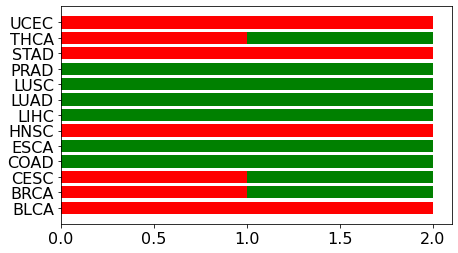

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,4))
plt.rc('font', size=16)

dft = df.T
a= [0,1,2]
for i in dft:
    novos_in = novos[i.lower()]
    novos_out = list(set(a) - set(novos_in))
    # print(novos_in)
    # print(novos_out)
    ax.barh(i,novos_in, color='green', label='in')
    ax.barh(i,novos_out, color='r', label='out')
    # print(novos[i.lower()])
    # print(dft[i])
    

In [71]:
# {k:len(novos[k]) for k in novos}
from collections import defaultdict
import numpy as np

all_f = np.array([False,False,False])
news = defaultdict()
for k in novos:
    a = all_f.copy()
    a[novos[k]] = True
    news[k] = a
    print(a)
# pd.DataFrame({k:all_f[novos[k]] for k in novos})

[ True  True False]
[ True False  True]
[ True False  True]
[ True  True  True]
[ True  True  True]
[ True  True False]
[ True  True  True]
[ True  True  True]
[False  True  True]
[ True  True  True]
[ True False False]
[ True False  True]
[ True False False]


In [ ]:
 
d = "Mean"
mean = df.T[d].to_numpy()
mean[-1] = 0.43
p = ax.bar(df.T[d].index.to_numpy(),df.T[d].to_numpy(), color=(0.2, 0.4, 0.6, 0.6))
ax.bar_label(p, df.T[d].round(3).to_list())
# for i,v in enumerate(df.T[d].round(3)):
#     ax.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
    # plt.text(v + 3, i + .25, str(v), color=(0.2, 0.4, 0.6, 0.9), fontweight='bold')
# ax.set_title('Mean')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
txt="a) MGNNdriver using only the healthy graph. b) MGNNdriver using only\n the diseased graph."
# plt.figtext(0.5, -0.04, txt, wrap=True, horizontalalignment='center', fontsize=12)
fig.tight_layout()
fig.savefig('results-main-bar-charts-mean.png',bbox_inches='tight')
plt.show()
plt.close()